# Import libararies and Reading data


In [16]:
import pandas as pd
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import os
import re
import html
import string
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [115]:
df = pd.read_csv("/content/drive/MyDrive/EdX.csv")

# indexing Data

In [116]:
# DATA PREPROCESSING
# Create unique IDs and set as index
df['id'] = range(len(df))
df = df.set_index('id')


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

In [117]:
df

,Name,University,Difficulty Level,Link,About,Course Description
id,,,,,,
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...
...,...,...,...,...,...,...
715,Global China: From the Mongols to the Ming,Harvard University,Beginner,https://www.edx.org/course/global-china-from-t...,Explore the impact of the conquest dynasties a...,"In the 13th century, by force of arms, the Mon..."
716,Leaders in Citizen Security and Justice Manage...,Inter-American Development Bank,Intermediate,https://www.edx.org/course/leaders-in-citizen-...,"Learn about the latest in prevention, police a...",The high rates of crime and violence are two o...
717,Computational Neuroscience: Neuronal Dynamics ...,École polytechnique fédérale de Lausanne,Advanced,https://www.edx.org/course/computational-neuro...,This course explains the mathematical and comp...,What happens in your brain when you make a dec...


# Tokenization

## TEXT PROCESSING FUNCTIONS


In [118]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    stop_words = stopwords.words('english')
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem or lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [119]:
# Store course names separately
target = df['Name']
df.drop(columns=['Name'], inplace=True)

# Apply text normalization to all columns
for col in df.columns:
    df[col] = df[col].apply(normalize_text)



# WORD2VEC MODEL TRAINING


In [120]:
# Create training sentences by combining features
sentences = []
for _, row in df.iterrows():
    # Combine multiple features into single text
    combined_text = ' '.join([
        str(row['University']),
        str(row['Difficulty Level']),
        str(row['About']),
        str(row['Course Description'])
    ])
    # Tokenize and add to training data
    sentences.append(word_tokenize(combined_text.lower()))

In [121]:
df

,University,Difficulty Level,Link,About,Course Description
id,,,,,
0,edx,beginner,httpswwwedxorgcoursehowtolearnonline,learn essential strategy successful online learn,design new elearning course prepare strategy s...
1,university michigan,beginner,httpswwwedxorgcourseprogrammingforeverybodyget...,course prerequisite introduction python progra...,course aim teach everyone basic program comput...
2,harvard university,beginner,httpswwwedxorgcoursecssintroductiontocomputers...,introduction intellectual enterprise computer ...,csx harvard university introduction intellectu...
3,massachusetts institute technology,intermediate,httpswwwedxorgcoursetheanalyticsedge,inspire example story discover power data use ...,last decade amount data available organization...
4,university california berkeley,beginner,httpswwwedxorgcoursemarketinganalyticsmarketin...,course part micromasters program,begin journey new career market analytics lear...
...,...,...,...,...,...
715,harvard university,beginner,httpswwwedxorgcourseglobalchinafromthemongolst...,explore impact conquest dynasty world ming,th century force arm mongol create greatest em...
716,interamerican development bank,intermediate,httpswwwedxorgcourseleadersincitizensecurityan...,learn latest prevention police justice moderni...,high rate crime violence two main challenge af...
717,ecole polytechnique federale de lausanne,advance,httpswwwedxorgcoursecomputationalneurosciencen...,course explain mathematical computational mode...,happen brain make decision happen recall memor...


In [122]:
from gensim.models import Word2Vec
# Initialize and train Word2Vec model
model = Word2Vec(
    sentences=sentences,
    vector_size=32,    # Dimension of embedding vectors
    window=20,         # Context window size (consider reducing to 5-10)
    min_count=1,       # Include all words regardless of frequency
    workers=4          # Parallel processing threads
)

#  EMBEDDING GENERATION


In [123]:

def get_course_embedding(text, model, embedding_size=100):
    """Generate document embedding by averaging word vectors"""
    # Convert text to tokens (assuming text is preprocessed)
    tokens = word_tokenize(text.lower())

    # Get valid word vectors
    valid_embeddings = [model.wv[word] for word in tokens if word in model.wv]

    # Handle empty embeddings case
    if not valid_embeddings:
        return np.zeros(embedding_size)

    # Return mean of all word vectors
    return np.mean(valid_embeddings, axis=0)

# Generate course embeddings
embedding_size = model.vector_size
df['Course_embedding'] = df['Course Description'].apply(
    lambda x: get_course_embedding(x, model, embedding_size)
)

# EMBEDDING VISUALLY

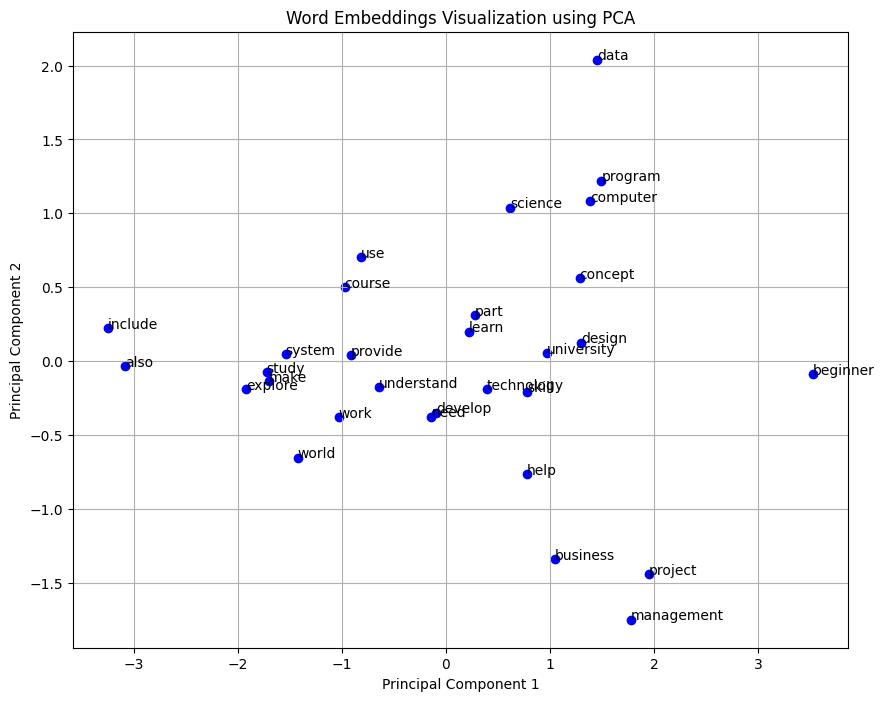

In [125]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select 30 random words from the vocabulary
words = list(model.wv.index_to_key)[:30]

# Get the word embeddings for these words
word_vectors = [model.wv[word] for word in words]

# Use PCA to reduce the word vectors to 2 dimensions
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], c='blue')

# Annotate each point with the word
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

# Display the plot
plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

# SIMILARITY CALCULATION


In [126]:
# Create cosine similarity matrix
embeddings_matrix = np.vstack(df['Course_embedding'].values)
cosine_sim = cosine_similarity(embeddings_matrix)

# Create index-to-course mapping
course_indices = pd.Series(df.index, index=target).drop_duplicates()

# 9. RECOMMENDATION FUNCTION
def recommend_courses(name, cosine_sim=cosine_sim, df=df, course_indices=course_indices):
    """Get top 10 similar courses using cosine similarity"""
    try:
        # Get index from course name
        idx = course_indices[name]

        # Get similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort by similarity
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get top 10 similar courses (excluding self)
        sim_scores = sim_scores[1:11]

        # Extract indices
        course_indices = [i[0] for i in sim_scores]

        return target.iloc[course_indices]

    except KeyError:
        return f"Course '{name}' not found in database"


In [128]:
Courses_indices = pd.Series(df.index, index=target).drop_duplicates()

# Function to recommend courses based on cosine similarity
def recommend_Courses(name, cosine_sim=cosine_sim, df=df, Courses_indices=Courses_indices):
    # Get the index of the course that matches the title
    idx = Courses_indices[name]

    # Get the pairwise similarity scores of all courses with that course
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the courses based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar courses
    sim_scores = sim_scores[1:11]

    # Get the course indices
    Courses_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar courses
    return target.iloc[Courses_indices]

# 10. EXAMPLE USAGE
# Test recommendation system
sample_course = target[20]
print(f"\nRecommendations for: {sample_course}")
print(recommend_courses(sample_course))


Recommendations for: Rhetoric: The Art of Persuasive Writing and Public Speaking
id
165                      Behavioural Economics in Action
699    How the U.S. Government Works & How to Get Inv...
11     Chasing your Dream: How to End Procrastination...
28                         The Architectural Imagination
513       Community Engagement: Collaborating for Change
417                   Information Technology Foundations
536    Fundamentals of Microeconomics | Fundamentos d...
326    The Rise of Superheroes and Their Impact On Po...
486    Sorting Truth From Fiction: Civic Online Reaso...
539    American Prophet: The Inner Life and Global Vi...
Name: Name, dtype: object
